In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "basilicata"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,17,Basilicata,0,0,0,0,0,0,0,...,0.0,32.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2020-12-04T17:00:00,17,Basilicata,165,20,185,6259,6444,39,142,...,3.0,1701.0,1716.0,35.0,10.81,2.87,8.35,8.28,0.00,0.61
284,2020-12-05T17:00:00,17,Basilicata,134,19,153,6259,6412,-32,131,...,8.0,1412.0,1392.0,0.0,12.42,2.39,9.28,9.41,-5.00,-0.50
285,2020-12-06T17:00:00,17,Basilicata,119,18,137,6231,6368,-44,81,...,6.0,1585.0,1590.0,-28.0,13.14,2.15,5.11,5.09,-5.26,-0.69
286,2020-12-07T17:00:00,17,Basilicata,124,16,140,6253,6393,25,106,...,5.0,713.0,738.0,22.0,11.43,2.19,14.87,14.36,-11.11,0.39


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 8, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 59
Nuovi tamponi: 871.0
Percentuale nuovi positivi/nuovi tamponi: 6.800000000000001 %
Nuovi guariti: 103.0
Nuovi deceduti: 1.0
Variazione positivi ricoverati con sintomi: -3.0
Variazione positivi in terapia intensiva: -1.0
Variazione positivi in isolamento dimiciliare: -41.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 8, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-09T17:00:00,17,Basilicata,35,0,35,413,448,19,22,...,0.0,926.0,1063.0,19.0,0.00,7.81,2.38,2.07,0.00,4.43
1,2020-10-10T17:00:00,17,Basilicata,36,0,36,439,475,27,37,...,0.0,861.0,856.0,26.0,0.00,7.58,4.30,4.32,0.00,6.03
2,2020-10-11T17:00:00,17,Basilicata,36,0,36,449,485,10,13,...,0.0,957.0,962.0,10.0,0.00,7.42,1.36,1.35,0.00,2.11
3,2020-10-12T17:00:00,17,Basilicata,36,0,36,459,495,10,11,...,0.0,130.0,130.0,10.0,0.00,7.27,8.46,8.46,0.00,2.06
4,2020-10-13T17:00:00,17,Basilicata,34,0,34,463,497,2,8,...,2.0,1201.0,1201.0,4.0,0.00,6.84,0.67,0.67,0.00,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-04T17:00:00,17,Basilicata,165,20,185,6259,6444,39,142,...,3.0,1701.0,1716.0,35.0,10.81,2.87,8.35,8.28,0.00,0.61
57,2020-12-05T17:00:00,17,Basilicata,134,19,153,6259,6412,-32,131,...,8.0,1412.0,1392.0,0.0,12.42,2.39,9.28,9.41,-5.00,-0.50
58,2020-12-06T17:00:00,17,Basilicata,119,18,137,6231,6368,-44,81,...,6.0,1585.0,1590.0,-28.0,13.14,2.15,5.11,5.09,-5.26,-0.69
59,2020-12-07T17:00:00,17,Basilicata,124,16,140,6253,6393,25,106,...,5.0,713.0,738.0,22.0,11.43,2.19,14.87,14.36,-11.11,0.39


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

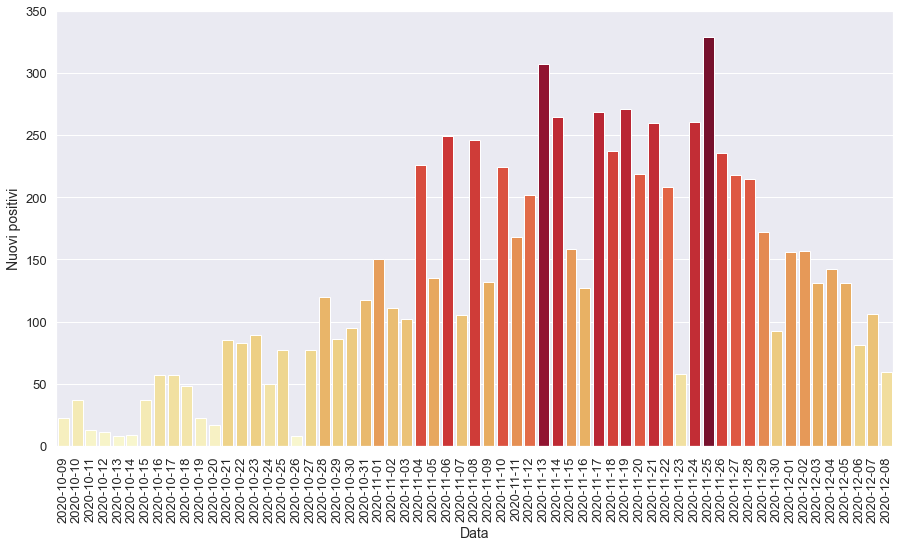

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

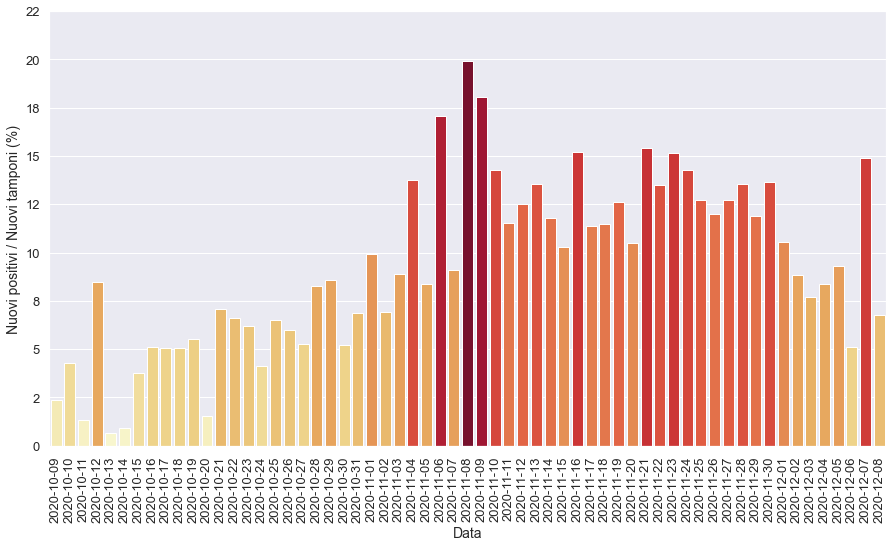

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

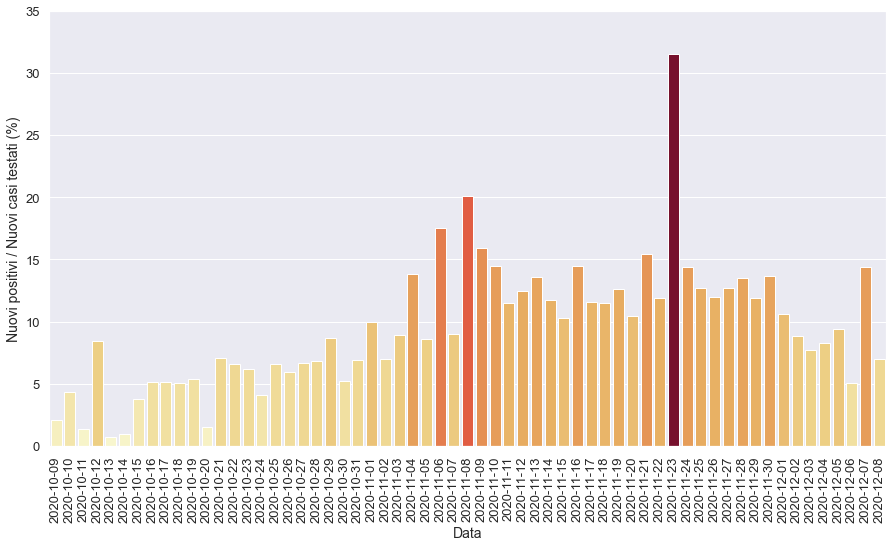

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

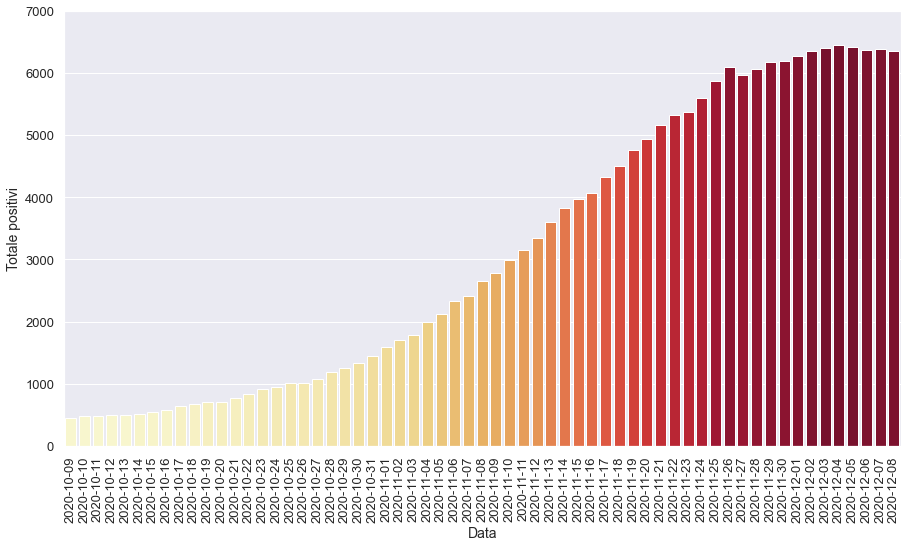

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

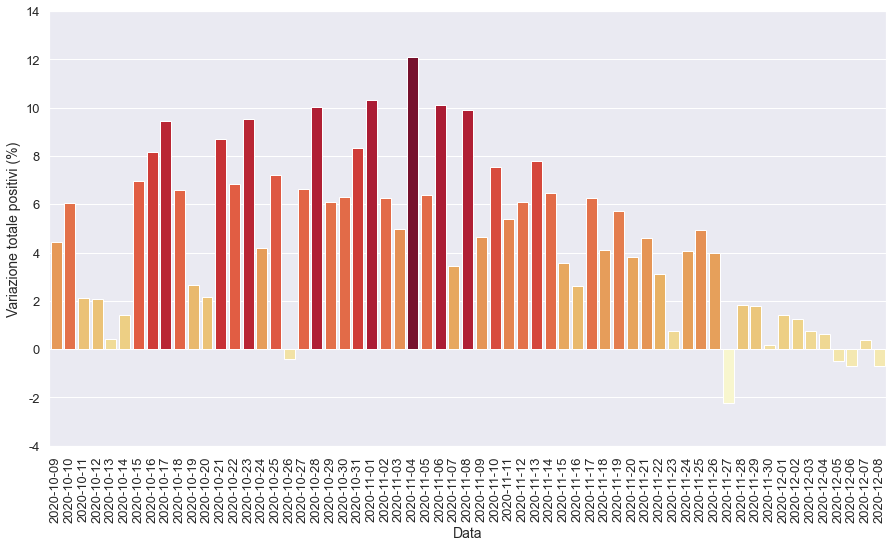

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

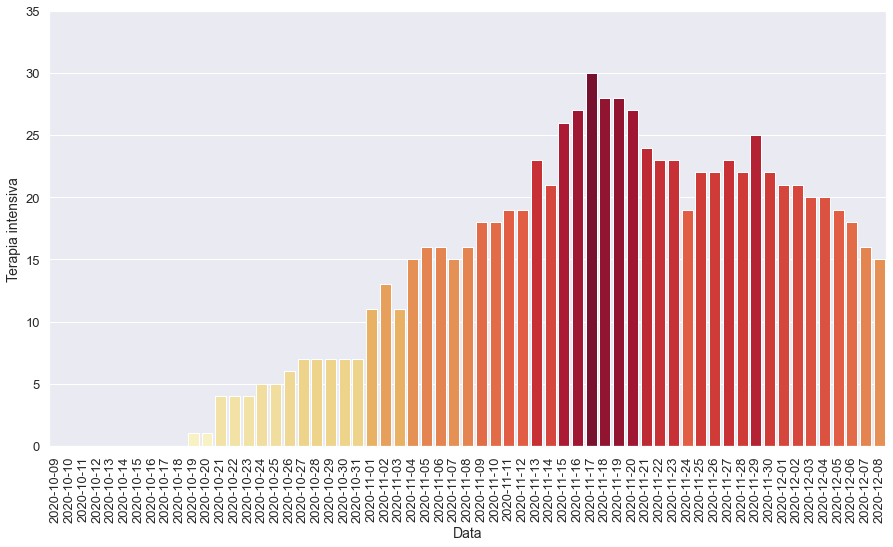

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

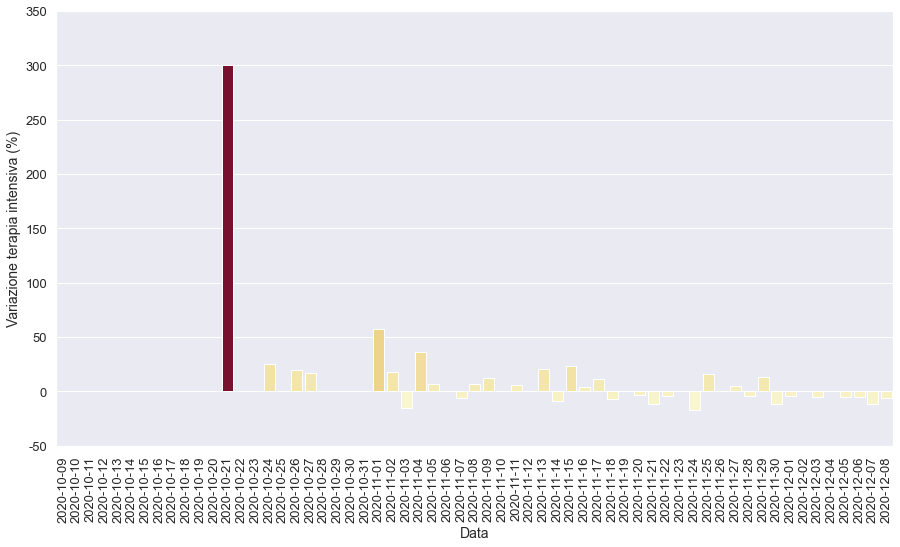

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

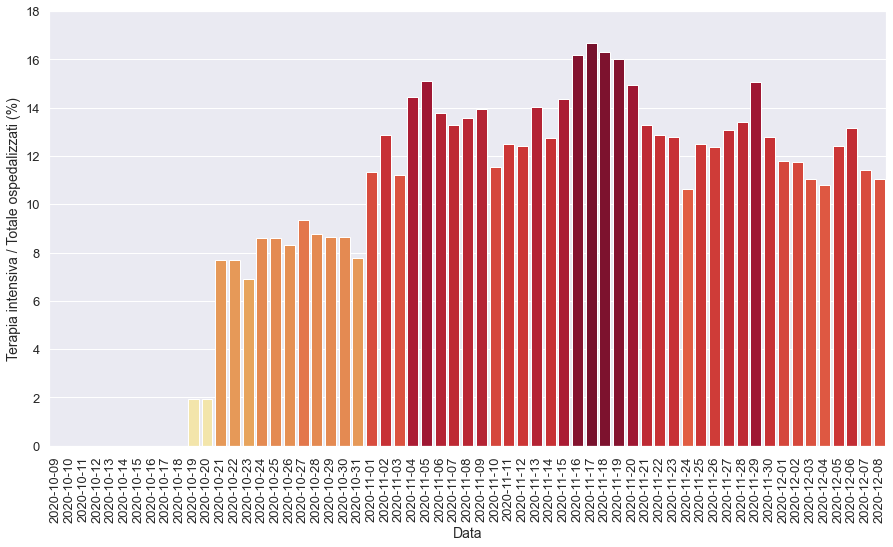

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

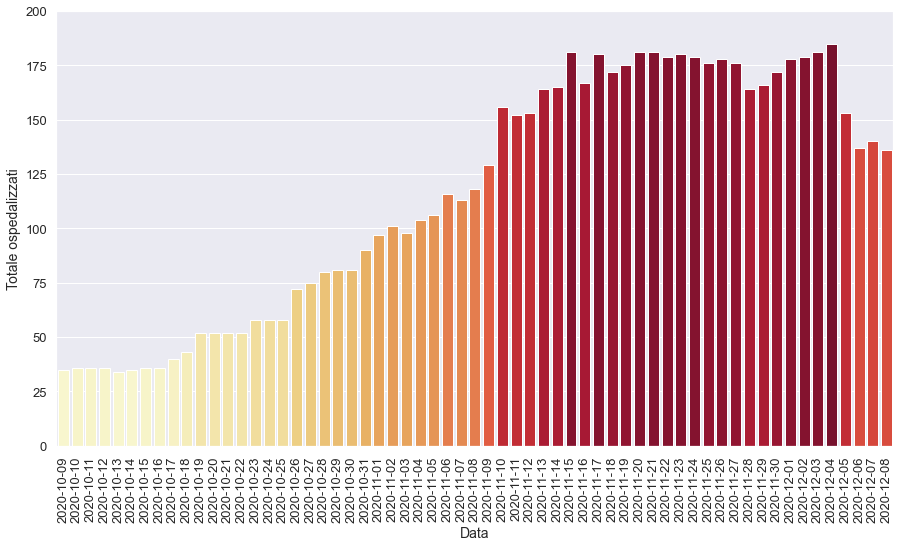

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

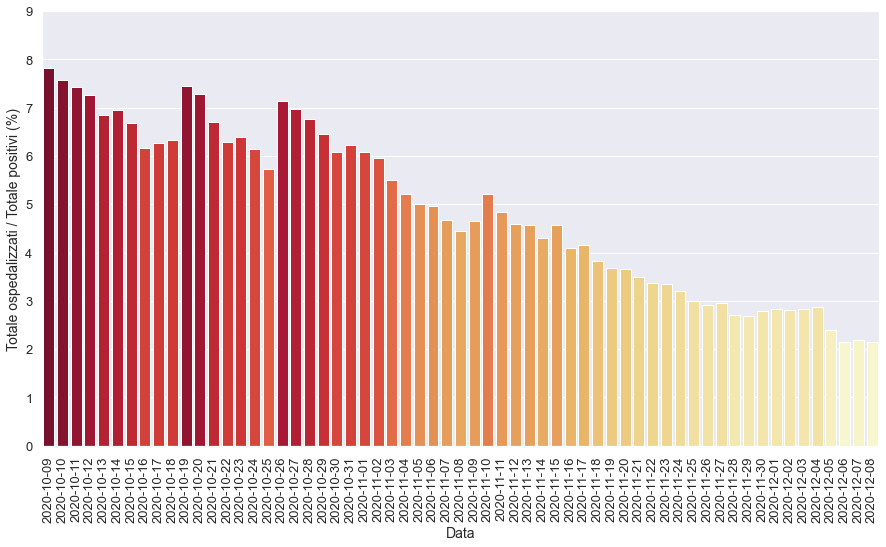

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

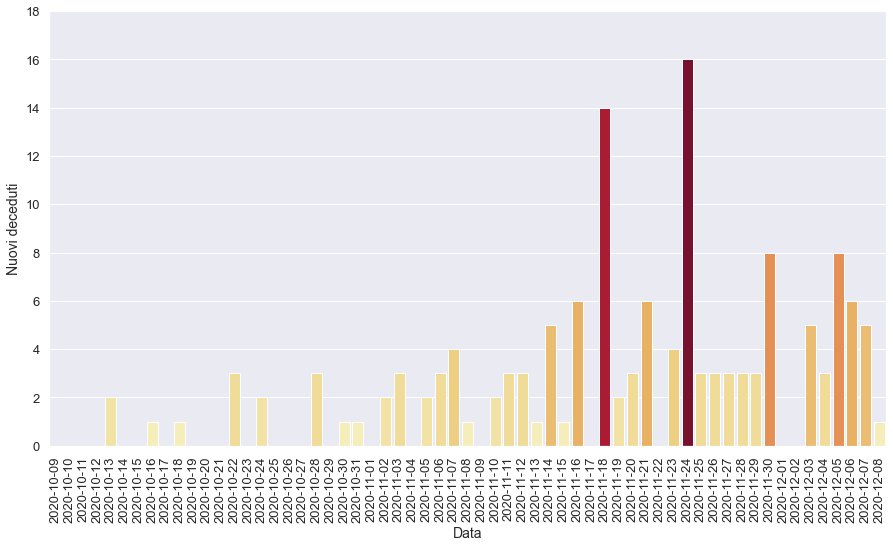

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

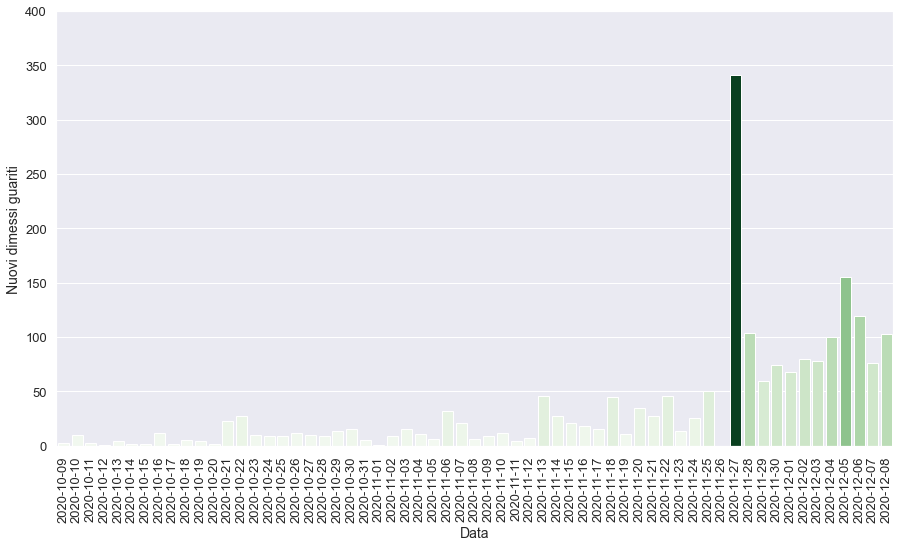

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-08T17:00:00,17,Basilicata,102,16,118,2536,2654,239,246,...,1.0,1236.0,1226.0,234.0,13.56,4.45,19.90,20.07,6.67,9.90
1,2020-11-09T17:00:00,17,Basilicata,111,18,129,2648,2777,123,132,...,0.0,731.0,831.0,112.0,13.95,4.65,18.06,15.88,12.50,4.63
2,2020-11-10T17:00:00,17,Basilicata,138,18,156,2831,2987,210,224,...,2.0,1571.0,1551.0,183.0,11.54,5.22,14.26,14.44,0.00,7.56
3,2020-11-11T17:00:00,17,Basilicata,133,19,152,2996,3148,161,168,...,3.0,1456.0,1466.0,165.0,12.50,4.83,11.54,11.46,5.56,5.39
4,2020-11-12T17:00:00,17,Basilicata,134,19,153,3187,3340,192,202,...,3.0,1615.0,1623.0,191.0,12.42,4.58,12.51,12.45,0.00,6.10
5,2020-11-13T17:00:00,17,Basilicata,141,23,164,3436,3600,260,307,...,1.0,2269.0,2256.0,249.0,14.02,4.56,13.53,13.61,21.05,7.78
6,2020-11-14T17:00:00,17,Basilicata,144,21,165,3668,3833,233,265,...,5.0,2250.0,2255.0,232.0,12.73,4.30,11.78,11.75,-8.70,6.47
7,2020-11-15T17:00:00,17,Basilicata,155,26,181,3788,3969,136,158,...,1.0,1532.0,1532.0,120.0,14.36,4.56,10.31,10.31,23.81,3.55
8,2020-11-16T17:00:00,17,Basilicata,140,27,167,3905,4072,103,127,...,6.0,836.0,876.0,117.0,16.17,4.10,15.19,14.50,3.85,2.60
9,2020-11-17T17:00:00,17,Basilicata,150,30,180,4146,4326,254,269,...,0.0,2371.0,2331.0,241.0,16.67,4.16,11.35,11.54,11.11,6.24


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

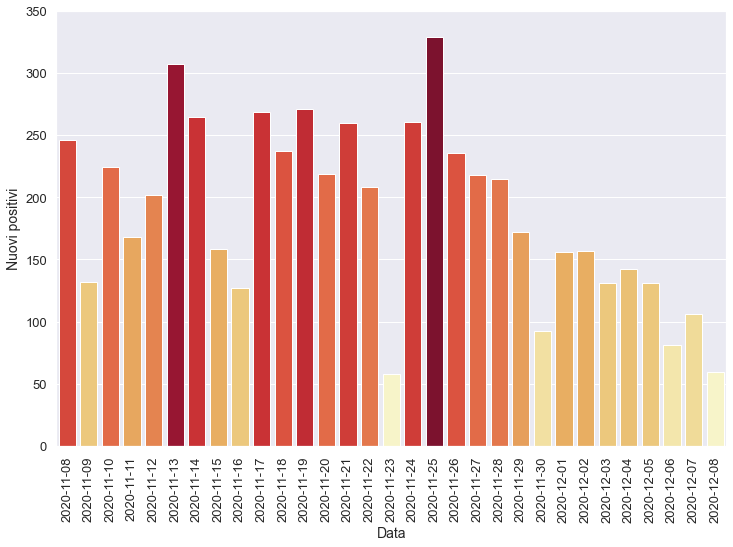

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

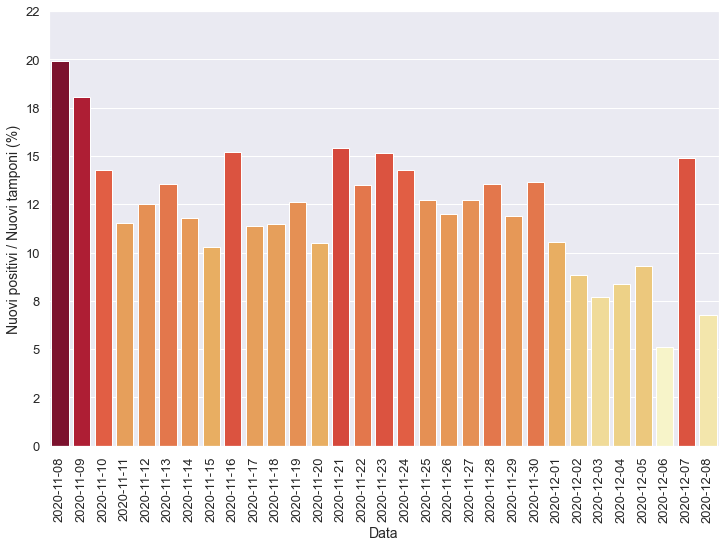

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

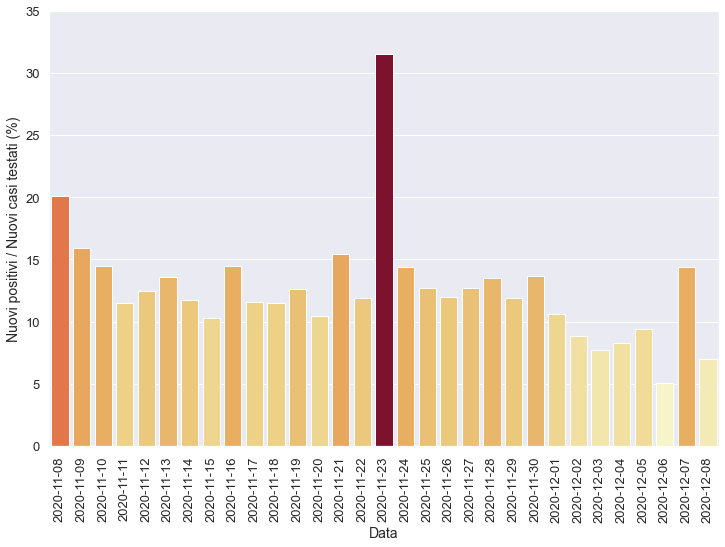

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

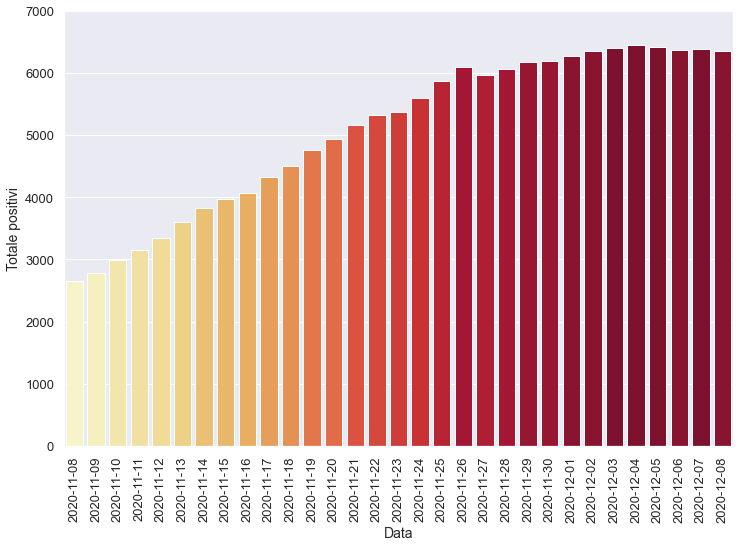

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

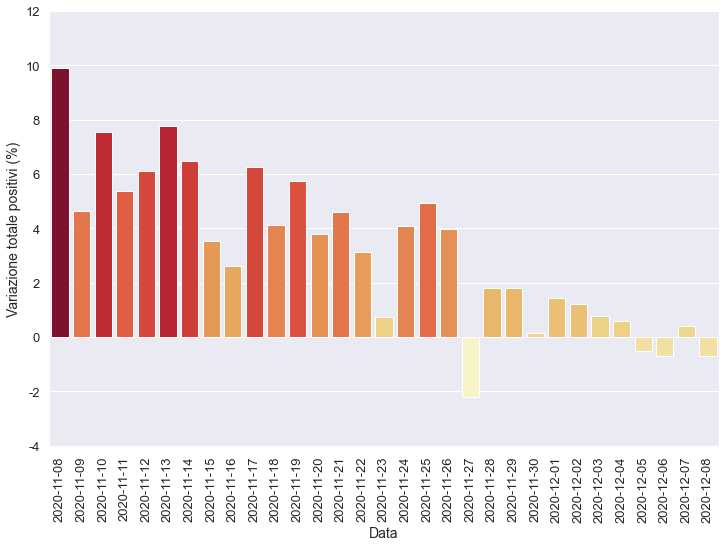

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

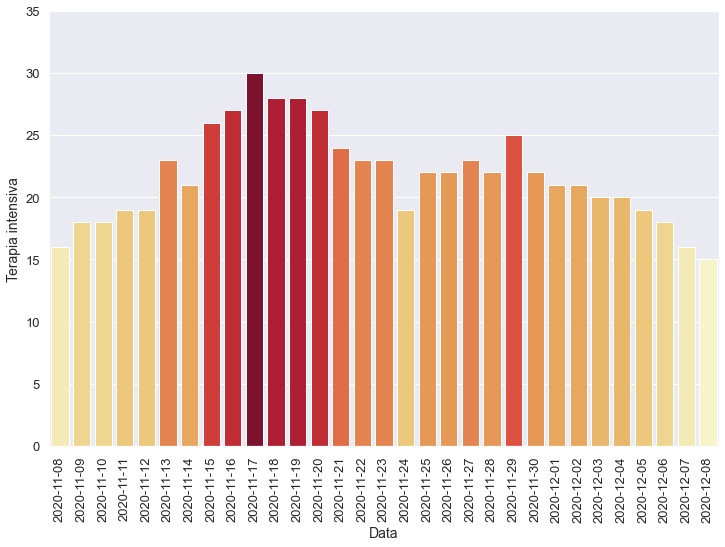

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

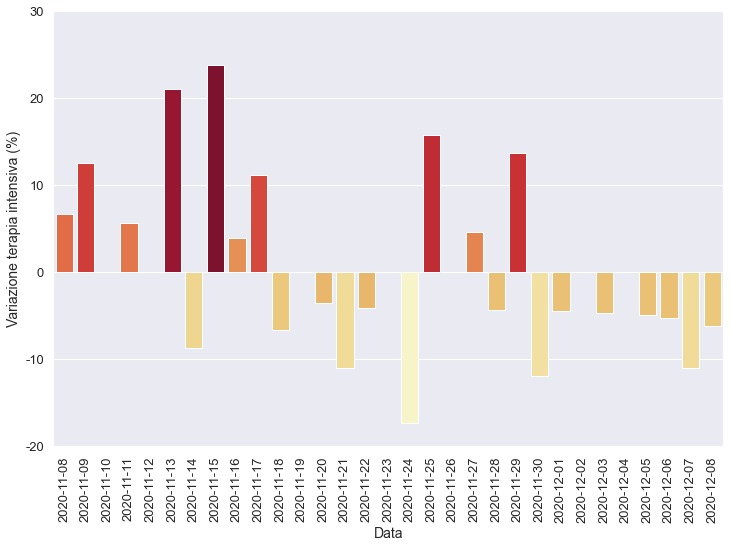

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

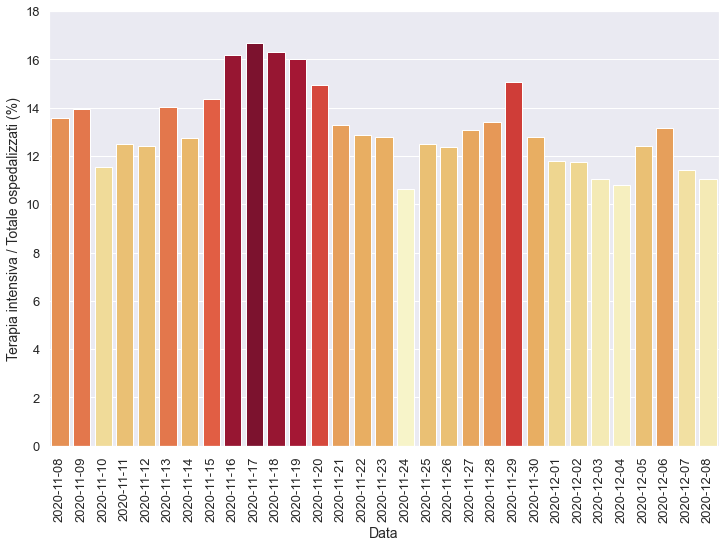

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

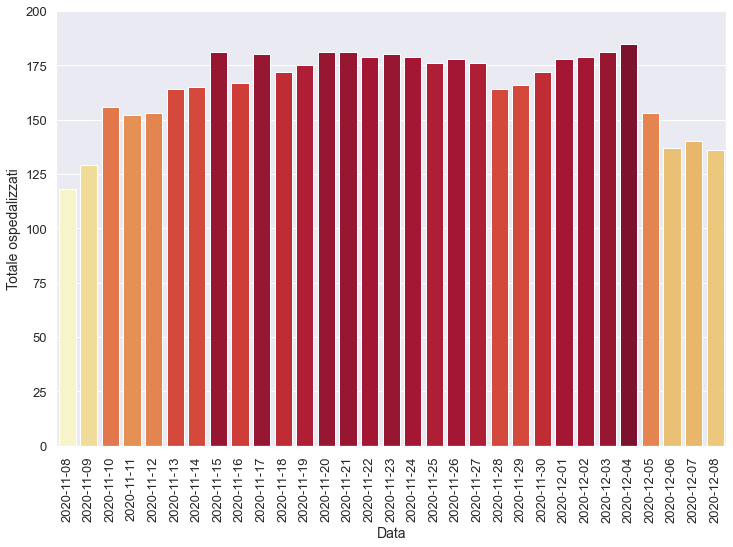

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

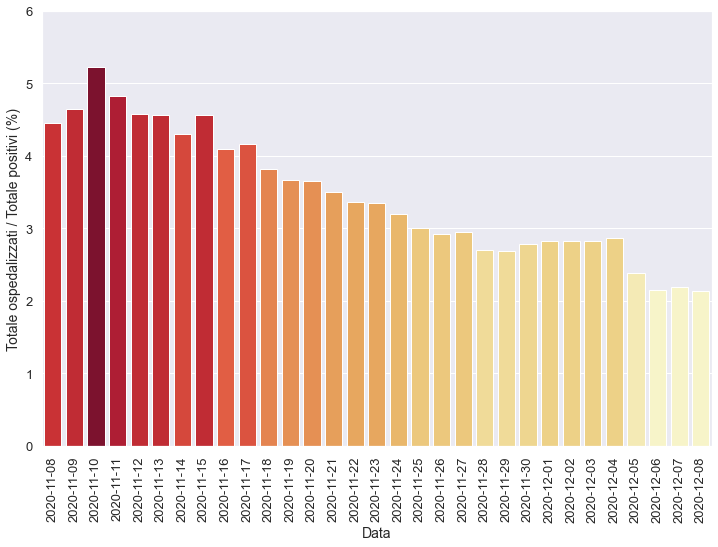

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

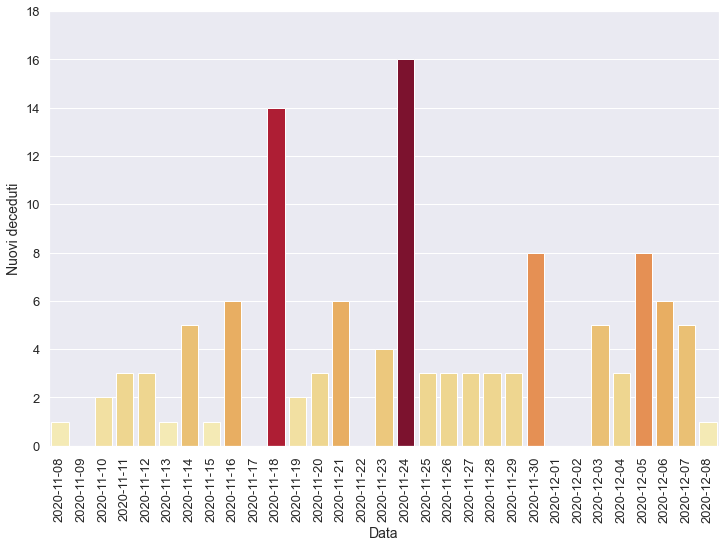

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

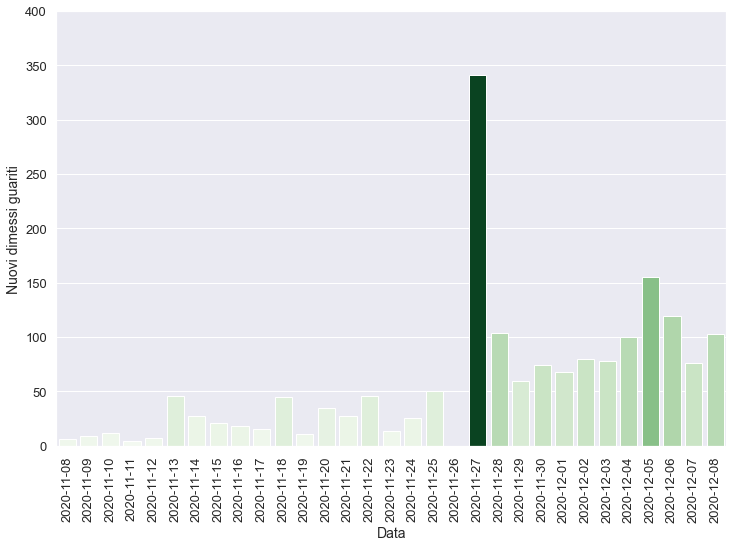

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-01T17:00:00,17,Basilicata,157,21,178,6102,6280,88,156,...,0.0,1476.0,1476.0,82.0,11.80,2.83,10.57,10.57,-4.55,1.42
1,2020-12-02T17:00:00,17,Basilicata,158,21,179,6178,6357,77,157,...,0.0,1776.0,1776.0,76.0,11.73,2.82,8.84,8.84,0.00,1.23
2,2020-12-03T17:00:00,17,Basilicata,161,20,181,6224,6405,48,131,...,5.0,1700.0,1705.0,46.0,11.05,2.83,7.71,7.68,-4.76,0.76
3,2020-12-04T17:00:00,17,Basilicata,165,20,185,6259,6444,39,142,...,3.0,1701.0,1716.0,35.0,10.81,2.87,8.35,8.28,0.00,0.61
4,2020-12-05T17:00:00,17,Basilicata,134,19,153,6259,6412,-32,131,...,8.0,1412.0,1392.0,0.0,12.42,2.39,9.28,9.41,-5.00,-0.50
5,2020-12-06T17:00:00,17,Basilicata,119,18,137,6231,6368,-44,81,...,6.0,1585.0,1590.0,-28.0,13.14,2.15,5.11,5.09,-5.26,-0.69
6,2020-12-07T17:00:00,17,Basilicata,124,16,140,6253,6393,25,106,...,5.0,713.0,738.0,22.0,11.43,2.19,14.87,14.36,-11.11,0.39
7,2020-12-08T17:00:00,17,Basilicata,121,15,136,6212,6348,-45,59,...,1.0,871.0,842.0,-41.0,11.03,2.14,6.77,7.01,-6.25,-0.70


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

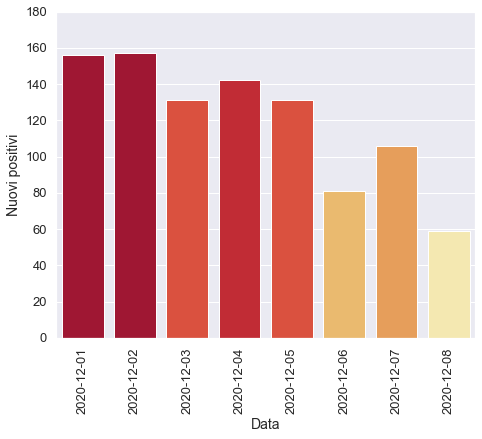

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

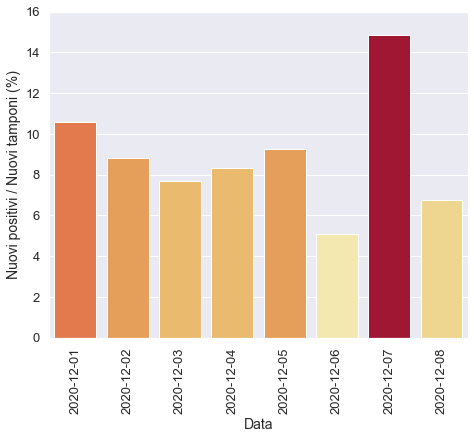

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

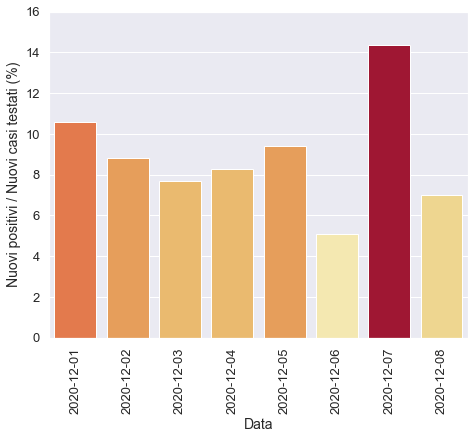

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

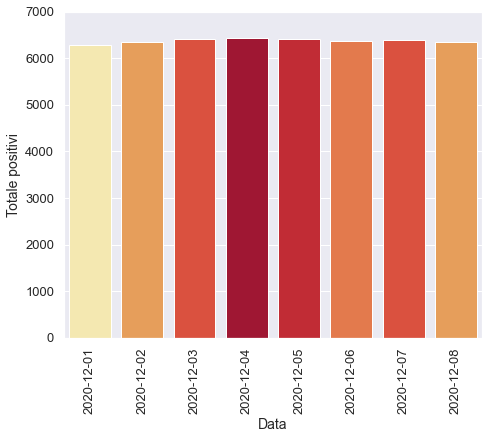

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

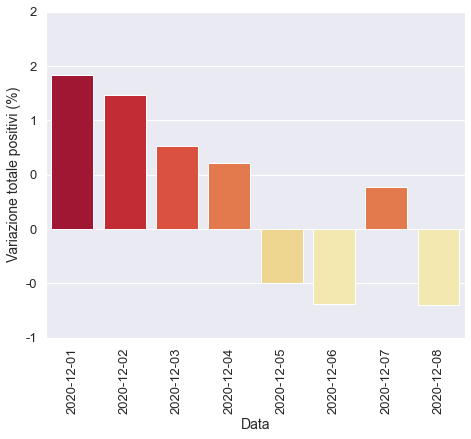

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

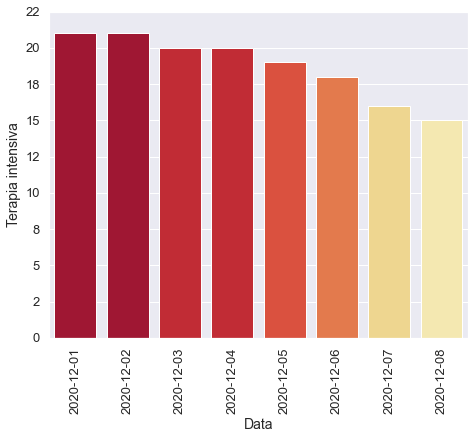

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

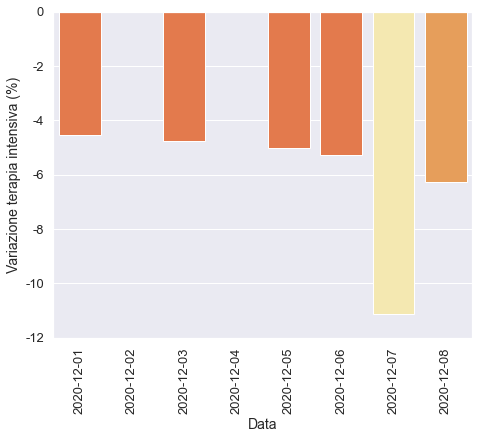

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

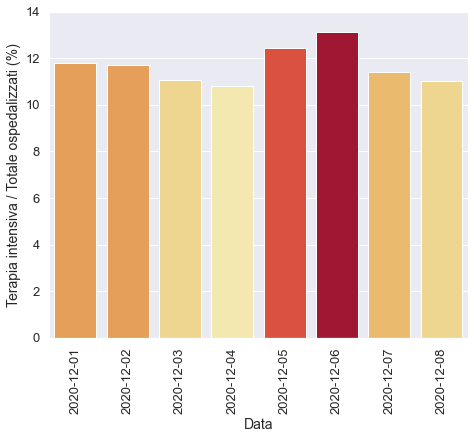

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

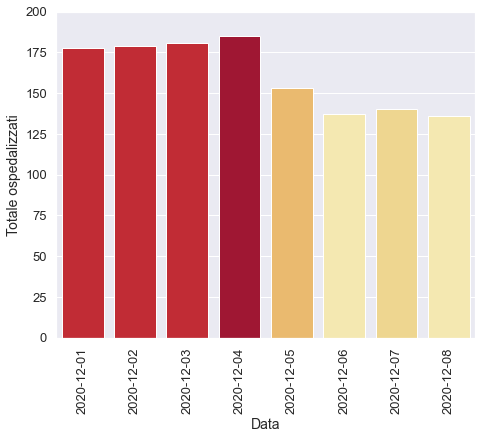

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

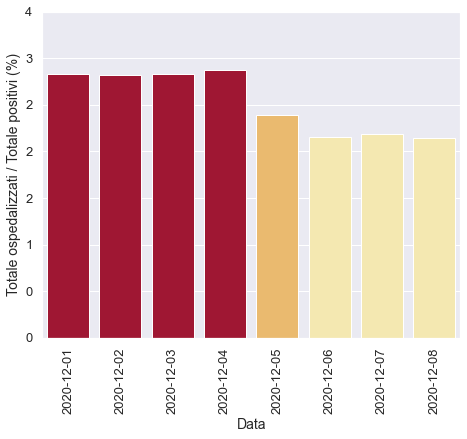

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

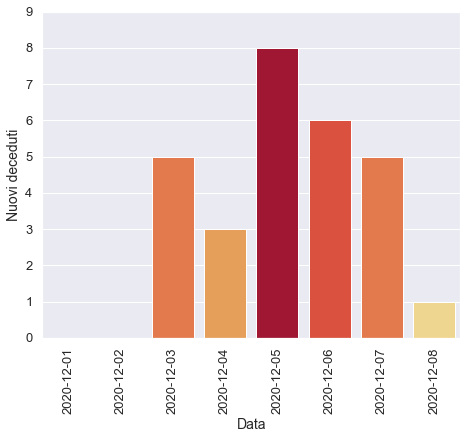

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

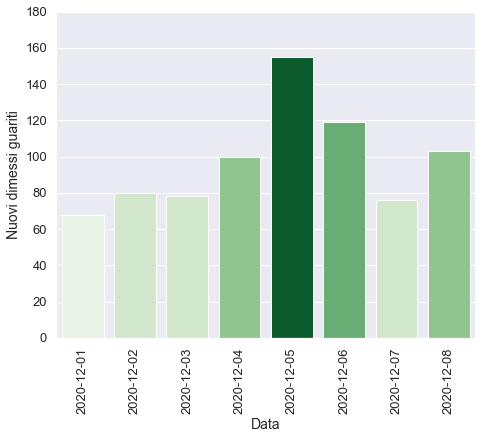

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)